# Serie 11

## Aufgabe 11.1

Eine Konsumentenschutzorganisation lässt den jährlichen Energieverbrauch von fünf verschiedenen Marken von Luftentfeuchtern vergleichen. Weil der Energieverbrauch von der aktuellen Luftfeuchtigkeit abhängt, wurde jede Marke bei vier verschiedenen Luftfeuchtigkeitsniveaus im Bereich moderat bis hohe Feuchtigkeit getestet. Von jeder Marke wurden deshalb vier Geräte zufällig den Luftfeuchtigkeitsniveaus zugeordnet. Der aus dem Versuch resultierende Energieverbrauch (in kWh) ist in folgender Tabelle festgehalten:

```text
Marke   Luftfeuchtigkeitsniveau
        1   2   3   4
    1   685 792 838 875
    2   722 806 893 953
    3   733 802 880 941
    4   811 888 952 1005
    5   828 920 978 1023
```

### a)
Tippen Sie die Daten selber ein und lesen Sie sie in `Python` ein.
`Python`-Hinweise: Die Daten werden in drei Spalten eingelesen: Spalte mit Energieverbrauch, mit Marke, mit Luftfeuchtigkeitsniveau.

```python
from pandas import DataFrame
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as st
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
from statsmodels.graphics.factorplots import interaction_plot
import matplotlib.pyplot as plt
from patsy.contrasts import Sum

df=DataFrame({
"Luftfeuchtigkeitsniveau" : np.tile(["1", "2", "3", "4"], 5),
"Marke": np.repeat(["1", "2", "3", "4", "5"], 4),
"Energieverbrauch" : np.array([685, 792, 838 , ..])
})
```

In [6]:
from pandas import DataFrame
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as st
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
from statsmodels.graphics.factorplots import interaction_plot
import matplotlib.pyplot as plt
from patsy.contrasts import Sum

luftf = DataFrame({
    "Marke": np.repeat(["1", "2", "3", "4", "5"], 4),
    "Luftfeuchtigkeitsniveau" : np.tile(["1", "2", "3", "4"], 5),
    "Energieverbrauch" : np.array([685, 792, 838, 875, 722, 806, 893, 953, 733, 802, 880, 941, 811, 888, 952, 1005, 828, 920, 978, 1023])
})
luftf.head()

,Marke,Luftfeuchtigkeitsniveau,Energieverbrauch
0,1,1,685
1,1,2,792
2,1,3,838
3,1,4,875
4,2,1,722


### b)
Können Sie auf dem 5%-Signifikanzniveau schliessen, dass es zwischen den fünf verschiedenen Marken einen Unterschied im Energieverbrauch gibt?

`Python`-Hinweise:

```python
fit = ols("Energieverbrauch ~ C(Marke, Sum) +
    C(Luftfeuchtigkeitsniveau, Sum)", data=df).fit()
anova_lm(fit)
```

In [28]:
fit = ols("Energieverbrauch ~ C(Marke, Sum) + C(Luftfeuchtigkeitsniveau, Sum)", data=luftf).fit()
anova_lm(fit)

,df,sum_sq,mean_sq,F,PR(>F)
"C(Marke, Sum)",4.0,53231.00,13307.75,95.567325,5.419353e-09
"C(Luftfeuchtigkeitsniveau, Sum)",3.0,116217.75,38739.25,278.199282,2.363880e-11
Residual,12.0,1671.00,139.25,NaN,NaN


Mit einem P-Wert von 5.419353e-09 verwerfen wir die Nullhypothese, dass es keinen Unterschied zwischen den Blöcken gibt,  auf dem 5%-Niveau

### c)
Können Sie auf dem 1% Signifikanzniveau schliessen, dass es zwischen den Niveaus (oder Stufen) des Block-Faktor `Luftfeuchtigkeit` einen Unterschied im Energieverbrauch gibt?

Stützt dieses Resultat den Entscheid der Versuchsleiterin, `Luftfeuchtigkeit` als Block-Faktor einzusetzen?

Mit einem p-Wert von 2.363880e-11 verwerfen wir die Nullhypothese, dass es keinen Unterschied zwischen den Blöcken gibt

### d)
Überprüfen Sie mit einem Interaktionsplot die Additivität.

Könnte man mit diesen Daten auf Wechselwirkung testen?

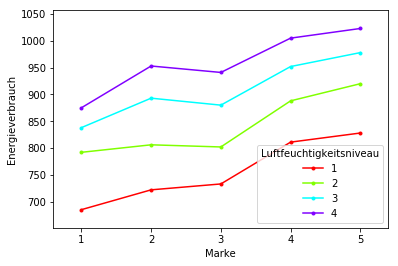

In [29]:
interaction_plot(x=luftf["Marke"], trace=luftf["Luftfeuchtigkeitsniveau"], response=luftf["Energieverbrauch"])
plt.ylabel("Energieverbrauch")
plt.show()

Könnte man schon, aber aufgrund des Plots würde ich erwarten, dass keine Wechselwirkung vorliegt, also das additive Modell gilt.

In [27]:
fit = ols("Energieverbrauch ~ C(Marke, Sum) * C(Luftfeuchtigkeitsniveau, Sum)", data=luftf).fit()
anova_lm(fit)

,df,sum_sq,mean_sq,F,PR(>F)
"C(Marke, Sum)",4.0,5.323100e+04,1.330775e+04,0.0,NaN
"C(Luftfeuchtigkeitsniveau, Sum)",3.0,1.162178e+05,3.873925e+04,0.0,NaN
"C(Marke, Sum):C(Luftfeuchtigkeitsniveau, Sum)",12.0,1.671000e+03,1.392500e+02,0.0,NaN
Residual,0.0,1.201997e-24,inf,NaN,NaN


## Aufgabe 11.2

In drei Städten der USA (Variable `STADT`) wurde der Benzinverbrauch von 5 Automobil-Typen (Variable `AUTO`, Werte von 1 bis 5) ermittelt. Pro Kombination wurden 3 Testfahrten durchgeführt. Die Zielgrösse (Variable `KMP4L`) ist die Strecke in km, welche mit 4 Litern Benzin zurückgelegt werden konnte. Die Daten befinden sich im Datensatz `automob.dat`

### a)
Stellen Sie die Variablen `AUTO` und `KMP4L` graphisch dar (wenn möglich mit unterschiedlichen Symbolen oder Farben bezüglich der Variablen `STADT`).

`Python`-Hinweise:

```python
from pandas import DataFrame
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as st
automob = pd.read_csv(".../automob.dat", sep=" ")
df = DataFrame(automob)
sns.stripplot(x="STADT", y="KMP4L", hue="AUTO", jitter=True, data=automob)
```

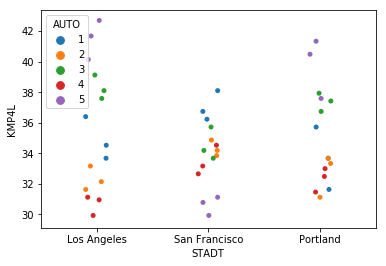

In [22]:
from pandas import DataFrame
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as st
automob = pd.read_csv("./automob.dat", sep=" ")
df = DataFrame(automob)
sns.stripplot(x="STADT", y="KMP4L", hue="AUTO", jitter=True, data=automob)

### b)
Analysieren Sie die Zielgrösse `KMP4L` mit einer zweifaktoriellen Varianzanalyse. Verwenden Sie das volle Modell mit Interaktion. `Python`-Hinweise:

```python
from pandas import DataFrame
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as st
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
from statsmodels.graphics.factorplots import interaction_plot
import matplotlib.pyplot as plt
fit = ols("KMP4L ~ C(STADT,Sum) * C(AUTO,Sum)", data=automob).fit()
anova_lm(fit)
```

In [24]:
fit = ols("KMP4L ~ C(STADT,Sum) * C(AUTO,Sum)", data=automob).fit()
anova_lm(fit)

,df,sum_sq,mean_sq,F,PR(>F)
"C(STADT, Sum)",2.0,19.599255,9.799628,7.438263,2.379745e-03
"C(AUTO, Sum)",4.0,179.741928,44.935482,34.107613,9.163330e-11
"C(STADT, Sum):C(AUTO, Sum)",8.0,244.619694,30.577462,23.209370,7.578447e-11
Residual,30.0,39.523858,1.317462,NaN,NaN


### c)
Stellen Sie die Zellenmittelwerte als Interaktionsplot dar. Wie lässt sich die signifikante Wechselwirkung erklären?

`Python`-Hinweis:

```python
automob = pd.read_table(".../automob.dat", sep = " ")
df = DataFrame(automob)
# Data frame row index should start from 0
df.reset_index(inplace = True)
interaction_plot(x = df["..."], trace = df["..."],
response = df["..."])
```

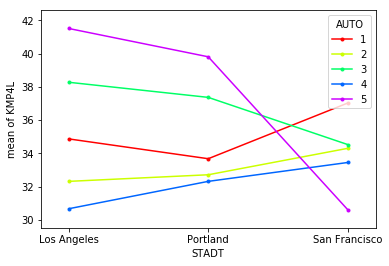

In [31]:
df = DataFrame(automob)
# Data frame row index should start from 0
df.reset_index(inplace = True)
interaction_plot(x=df["STADT"], trace=df["AUTO"], response=df["KMP4L"])
plt.show()

### d)
Führen Sie für jede Stadt separat eine einfaktorielle Varianzanalyse durch.

In [42]:
los_angeles = automob.groupby("STADT").get_group('Los Angeles')
fit = ols("KMP4L~AUTO",data=los_angeles).fit()
print("Los Angeles:")
print(anova_lm(fit))
print("")

portland = automob.groupby("STADT").get_group('Portland')
fit = ols("KMP4L~AUTO",data=portland).fit()
print("Portland:")
print(anova_lm(fit))
print("")

san_francisco = automob.groupby("STADT").get_group('San Francisco')
fit = ols("KMP4L~AUTO",data=san_francisco).fit()
print("San Francisco:")
print(anova_lm(fit))
print("")


Los Angeles:
            df      sum_sq    mean_sq         F    PR(>F)
AUTO       1.0   40.531726  40.531726  2.601956  0.130732
Residual  13.0  202.506243  15.577403       NaN       NaN

Portland:
            df      sum_sq    mean_sq         F   PR(>F)
AUTO       1.0   42.128883  42.128883  5.087787  0.04197
Residual  13.0  107.645126   8.280394       NaN      NaN

San Francisco:
            df     sum_sq    mean_sq          F   PR(>F)
AUTO       1.0  56.017208  56.017208  48.366729  0.00001
Residual  13.0  15.056294   1.158176        NaN      NaN



### e)
Wiederholen Sie Teilaufgabe __b)__ ohne die Werte von San Francisco.

In [47]:
concat = pd.concat([los_angeles, portland])
fit = ols("KMP4L ~ C(STADT,Sum) * C(AUTO,Sum)", data=concat).fit()
print(concat)
anova_lm(fit)

    level_0  index  STADT.index  AUTO   MPG    KMP4L        STADT
0         0      1            1     1  20.3  34.5303  Los Angeles
1         1      2            1     1  19.8  33.6798  Los Angeles
2         2      3            1     1  21.4  36.4014  Los Angeles
3         3      4            1     2  19.5  33.1695  Los Angeles
4         4      5            1     2  18.6  31.6386  Los Angeles
5         5      6            1     2  18.9  32.1489  Los Angeles
6         6      7            1     3  22.1  37.5921  Los Angeles
7         7      8            1     3  23.0  39.1230  Los Angeles
8         8      9            1     3  22.4  38.1024  Los Angeles
9         9     10            1     4  17.6  29.9376  Los Angeles
10       10     11            1     4  18.3  31.1283  Los Angeles
11       11     12            1     4  18.2  30.9582  Los Angeles
12       12     13            1     5  23.6  40.1436  Los Angeles
13       13     14            1     5  24.5  41.6745  Los Angeles
14       1

,df,sum_sq,mean_sq,F,PR(>F)
"C(STADT, Sum)",1.0,0.926853,0.926853,0.575105,4.570817e-01
"C(AUTO, Sum)",4.0,349.513196,87.378299,54.217534,1.870272e-10
"C(STADT, Sum):C(AUTO, Sum)",4.0,11.066294,2.766574,1.716637,1.858312e-01
Residual,20.0,32.232487,1.611624,NaN,NaN


## Aufgabe 11.3

### a)
Der Datensatz `stream` enthält die Zinkstufen (Variable `ZINC`) verschiedener Flüsse (Variable `STREAM`) und die entsprechende Biodiversität (Variable `DIVERSITY`).Zusätzlich kodiert die Variable `ZNGROUP` die verschiedenen Zink-Gruppen numerisch. Wir wollen untersuchen, ob eine signifikante Beziehung zwischen der Biodiversität und den Zink-Gruppen besteht.

Lesen Sie den in der Datei `stream.dat` gespeicherten Datensatz ein. Erstellen Sie einen Boxplot und Stripchart von `DIVERSITY` versus `ZNGROUP`, und kommentieren Sie die Graphik in Bezug auf Unterschiede und Ausreisser.


### b)
Sie möchten feststellen, ob es einen signifikanten Unterschied der `DIVERSITY` für die unterschiedlichen Zink-Gruppen gibt. Formulieren Sie ein entsprechendes Modell, und führen Sie die entsprechende Varianzanalyse durch.

### c)
Wie lauten die Schätzungen der Gruppenmittelwerte? Sind diese kompatibel
mit Ihrer Beobachtung der Stripcharts?

### d)
Nun möchten Sie überprüfen, ob die unterschiedlichen Flüsse `STREAM` neben der Zinkgruppe `ZNGROUP` einen Einfluss auf `DIVERSITY` haben. Führen Sie eine Zweiweg-Varianzanalyse durch. Wie interpretieren Sie die Variable `STREAM` in Bezug auf den Versuchsplan?